In [1]:
from bots.train_params import train_params

# Train for L win

In [6]:
top_ten_list, win_percentages_f = train_params(
    party="l",
    seed=5928057,
    games_per_generation=1000,
    population_size=1000,
    generations=100,
    keep_percentage=0.01
)

  9%|▉         | 9/100 [16:43<2:49:11, 111.55s/it]


KeyboardInterrupt: 

In [5]:
import matplotlib.pyplot as plt
import numpy as np

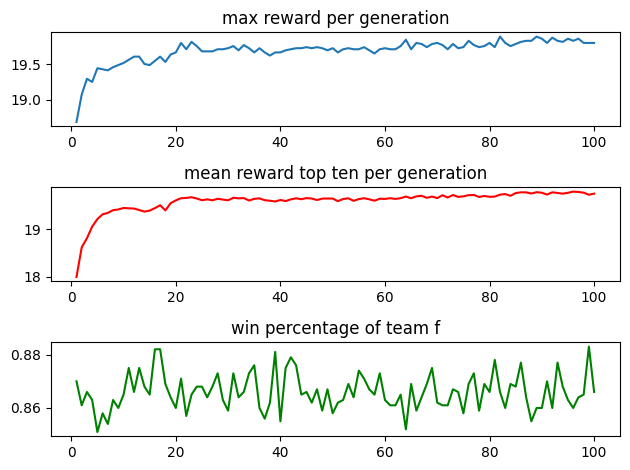

In [8]:
max_reward = [max(top_ten[:, 1]) for top_ten in top_ten_list]
mean_reward = [top_ten[:, 1].sum() / 10 for top_ten in top_ten_list]
generations = np.arange(1, 101)

fig, ax = plt.subplots(3)

ax[0].plot(generations, max_reward)
ax[0].set_title('max reward per generation')

ax[1].plot(generations, mean_reward, color='red')
ax[1].set_title('mean reward top ten per generation')

ax[2].plot(generations, win_percentages_f, color='green')
ax[2].set_title('win percentage of team f')
plt.tight_layout()

In [29]:
top_ten_list[88][9][0]

{'propose': Array(-2516932, dtype=int32),
 'vote': Array(647327, dtype=int32),
 'presi': Array(332263, dtype=int32),
 'chanc': Array(614780, dtype=int32),
 'shoot': Array(584278, dtype=int32)}

# Train for F win

In [3]:
top_ten_list, win_percentages_f = train_params(
    party="f",
    seed=34953297,
    games_per_generation=1000,
    population_size=1000,
    generations=35,
    keep_percentage=0.01
)

100%|██████████| 35/35 [57:08<00:00, 97.96s/it]  


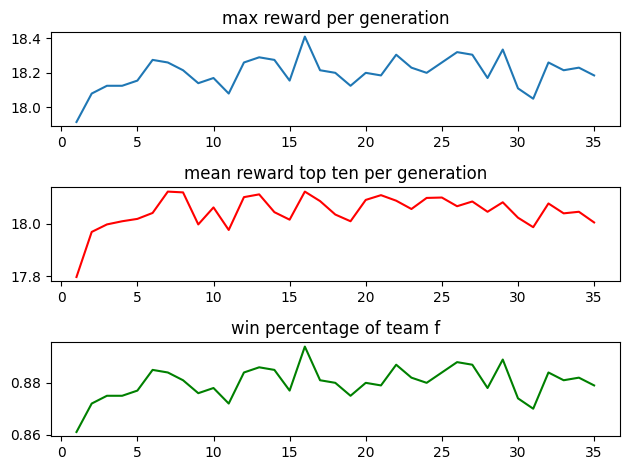

In [6]:
max_reward = [max(top_ten[:, 1]) for top_ten in top_ten_list]
mean_reward = [top_ten[:, 1].sum() / 10 for top_ten in top_ten_list]
generations = np.arange(1, 36)

fig, ax = plt.subplots(3)

ax[0].plot(generations, max_reward)
ax[0].set_title('max reward per generation')

ax[1].plot(generations, mean_reward, color='red')
ax[1].set_title('mean reward top ten per generation')

ax[2].plot(generations, win_percentages_f, color='green')
ax[2].set_title('win percentage of team f')
plt.tight_layout()

In [18]:
top_ten_list[28][9][0]

{'propose': Array(-900242, dtype=int32),
 'vote': Array(215421, dtype=int32),
 'presi': Array(-152254, dtype=int32),
 'chanc': Array(-694819, dtype=int32),
 'shoot': Array(556595, dtype=int32)}

In [24]:
from bots import run
import jax.random as jrn
import jax.numpy as jnp

In [32]:
def bot_role(state):
    role_is_l = state["roles"][0].sum() == 0

    role_is_f = state["roles"][0].sum() == jnp.ceil(
        state["roles"][0].shape[0] / 2
    )

    role_is_h = state["roles"][0].sum() == 2

    return role_is_l, role_is_f, role_is_h


def param_bot_propose(state, **_):
    key = jrn.PRNGKey(-2304297)
    key, subkey1 = jrn.split(key)

    # L choice
    chanc_propose_l = jrn.uniform(
        key=subkey1,
        shape=state["roles"][0].shape
    )

    key = jrn.PRNGKey(-126593)
    key, subkey2, subkey3 = jrn.split(key, 3)
    # F choice
    chanc_propose_f = jrn.uniform(
        key=subkey2,
        shape=state["roles"][0].shape
    )

    # H choice
    chanc_propose_h = jrn.uniform(
        key=subkey3,
        shape=state["roles"][0].shape
    )

    # figure out the role of the bot
    l, f, h = bot_role(state)

    # create returns corresponding to role
    chanc_propose = chanc_propose_l * l + chanc_propose_f * f \
                    + chanc_propose_h * h

    return chanc_propose


def param_bot_vote(state, **_):
    key = jrn.PRNGKey(963348)
    key, subkey1 = jrn.split(key)

    # L choice
    vote_l = jrn.uniform(key=subkey1)

    key = jrn.PRNGKey(-148316)
    key, subkey2, subkey3 = jrn.split(key, 3)
    # F choice
    vote_f = jrn.uniform(key=subkey2)

    # H choice
    vote_h = jrn.uniform(key=subkey3)

    # figure out the role of the bot
    l, f, h = bot_role(state)

    # create returns corresponding to role
    vote = vote_l * l + vote_f * f + vote_h * h

    return vote


def param_bot_presi_discard(state, **_):
    key = jrn.PRNGKey(332263)
    key, subkey1 = jrn.split(key)

    # L choice
    presi_discard_l = jrn.uniform(key=subkey1)

    key = jrn.PRNGKey(6926)
    key, subkey2, subkey3 = jrn.split(key, 3)
    # F choice
    presi_discard_f = jrn.uniform(key=subkey2)

    # H choice
    presi_discard_h = jrn.uniform(key=subkey3)

    # figure out the role of the bot
    l, f, h = bot_role(state)

    # create returns corresponding to role
    presi_discard = presi_discard_l * l \
                    + presi_discard_f * f \
                    + presi_discard_h * h

    return presi_discard


def param_bot_chanc_discard(state, **_):
    key = jrn.PRNGKey(614780)
    key, subkey1 = jrn.split(key)

    # L choice
    chanc_discard_l = jrn.uniform(key=subkey1)

    key = jrn.PRNGKey(-165073)
    key, subkey2, subkey3 = jrn.split(key, 3)

    # F choice
    chanc_discard_f = jrn.uniform(key=subkey2)

    # H choice
    chanc_discard_h = jrn.uniform(key=subkey3)

    # figure out the role of the bot
    l, f, h = bot_role(state)

    # create returns corresponding to role
    chanc_discard = chanc_discard_l * l \
                    + chanc_discard_f * f \
                    + chanc_discard_h * h

    return chanc_discard


def param_bot_shoot(state, **_):
    key = jrn.PRNGKey(648991)
    key, subkey1 = jrn.split(key)

    # L choice
    shoot_l = jrn.uniform(
        key=subkey1,
        shape=state["roles"][0].shape
    )

    key = jrn.PRNGKey(14062)
    key, subkey2, subkey3 = jrn.split(key, 3)

    # F choice
    shoot_f = jrn.uniform(
        key=subkey2,
        shape=state["roles"][0].shape
    )

    # H choice
    shoot_h = jrn.uniform(
        key=subkey3,
        shape=state["roles"][0].shape
    )

    # figure out the role of the bot
    l, f, h = bot_role(state)

    # create returns corresponding to role
    shoot = shoot_l * l + shoot_f * f + shoot_h * h

    return shoot

# create bots
propose_bot = run.fuse(
    param_bot_propose,
    param_bot_propose,
    param_bot_propose
)

vote_bot = run.fuse(
    param_bot_vote,
    param_bot_vote,
    param_bot_vote
)

presi_bot = run.fuse(
    param_bot_presi_discard,
    param_bot_presi_discard,
    param_bot_presi_discard
)

chanc_bot = run.fuse(
    param_bot_chanc_discard,
    param_bot_chanc_discard,
    param_bot_chanc_discard
)

shoot_bot = run.fuse(
    param_bot_shoot,
    param_bot_shoot,
    param_bot_shoot
)

# create run function
run_func = run.closure(
    player_total=10,
    history_size=30,
    propose_bot=propose_bot,
    vote_bot=vote_bot,
    presi_bot=presi_bot,
    chanc_bot=chanc_bot,
    shoot_bot=shoot_bot
)

winner_func = run.evaluate(run_func, 1000)

key = jrn.PRNGKey(6387920)
key, subkey = jrn.split(key)

winner = winner_func(subkey, {'propose': -2304297, 'vote': 963348, 'presi': 332263, 'chanc': 614780, 'shoot': 648991})

result = winner.mean(axis=0)

In [33]:
print(result)

0.73600006
